
<h1 style="color: #1E90FF;">EDA: FEMA Public Assistance and Disaster Declaration Data</h1>

The Federal Emergency Management Agency (FEMA) is a U.S. government agency dedicated to coordinating disaster response efforts to ensure efficient and timely support for those impacted by emergencies. FEMA collaborates closely with local and state governments, as well as partner organizations, to provide critical resources, funding, and guidance during times of crisis.

<div style="display: flex; justify-content: center; gap: 50px; align-items: center; margin: 20px auto; width: fit-content;">
    <img src="./hurricane.jpg" alt="Image 1" style="max-width: 300px; height: auto; object-fit: contain; border-radius: 5px; padding: 10px;" />
    <img src="./tornado.jpg" alt="Image 2" style="max-width: 300px; height: auto; object-fit: contain; border-radius: 5px; padding: 10px;" />
    <img src="./virus.jpg" alt="Image 3" style="max-width: 300px; height: auto; object-fit: contain; border-radius: 5px; padding: 10px;" />
</div>

*Images generated by OpenAI's DALL·E via ChatGPT.*

<h2 style="color: #1E90FF;">Data Overview</h2>

This exploratory data analysis utilized two key datasets sourced from FEMA's official repository, accessed on **November 8, 2024**. These datasets are publicly available and can be [downloaded from FEMA’s OpenFEMA Data Sets](https://www.fema.gov/about/openfema/data-sets):

<h3 style="color: #1E90FF;">1. Public Assistance Funded Projects Details Dataset</h3>

- **Scope**: Contains comprehensive details of federally funded project expenditures related to disaster incidents.
- **Timeframe**: Covers data from **2011 to the present**.
- **Size**: Comprises a total of **800,863 records** and 22 columns.
- **Source**: Derived from FEMA’s Emergency Management Mission Integrated Environment (EMMIE).
- **Note**: The dataset is raw and may include minor human errors due to its unprocessed nature.

<h3 style="color: #1E90FF;">2. Disaster Declarations Summaries Dataset</h3>

- **Scope**: Provides summaries of all federally declared disasters.
- **Timeframe**: Includes data from **1953 to the present**.
- **Size**: Comprises a total of **67,244 records and 28 columns**.
- **Source**: Also sourced from FEMA’s EMMIE system.

<h2 style="color: #1E90FF;">Objective and Key Questions</h2>

Emergency management companies submit bids to support state and local governments during disaster events. This data exploration aims to identify trends in disaster declarations and incidents over the past decade to inform strategic decision-making, such as:

- Where to submit proposals
- Optimal times of the year for bids
- Prioritizing types of incidents based on funding distribution

1. What types of disasters are most frequently declared?

2. How is funding distributed across different types of incidents, and which types receive the most significant allocations?

3. Which states receive the highest levels of funding, and what factors contribute to this distribution?
   
4. During which seasons or times of the year are disasters most likely to occur, and are there any notable patterns?

<!-- HTML for the image as a rectangular banner -->
<div style="display: flex; justify-content: center; gap: 50px; align-items: center; margin: 20px auto; width: fit-content;">
    <img src="./target.jpg" alt="Strategic Recommendations" style="max-width: 500px; height: auto; object-fit: contain; border-radius: 5px; padding: 10px;" />
</div>

*Image generated by OpenAI's DALL·E via ChatGPT.*


<h3 style="color: #1E90FF;">Step 1: Imports</h3>

In [35]:
import pandas as pd  # Import for reading CSV files and performing data manipulation
import matplotlib.pyplot as plt  # Used for creating data visualizations and plots
import seaborn as sns  # Provides advanced statistical data visualization capabilities
import folium  # Utilized for creating interactive geographical visualizations
import matplotlib.ticker as mticker  # Enables formatting and customization of axis labels
import warnings

from folium import Choropleth  # Used for generating choropleth maps that display color-coded geographic regions
from datetime import datetime  # Facilitates operations involving dates and times
warnings.filterwarnings("ignore")

In [ ]:
# Nick: Since mticker and datetime weren't used, I'd remove them

<h3 style="color: #1E90FF;">Step 2: Data Loading</h3>

In [ ]:
#The Public Assistance Funded Projects Details dataset was loaded and assigned to the variable 'fema_data'
fema_data = pd.read_csv('/Users/mel/Downloads/PublicAssistanceFundedProjectsDetails.csv')

# The Disaster Declarations Summaries dataset was loaded and assigned to the variable 'declarations'
# The 'low_memory=False' parameter was used to read the entire file into memory at once, ensuring consistent data type inference and avoiding mixed-type warnings
declarations =  pd.read_csv('/Users/mel/Desktop/daft04-3-milestone-project-melanieguzman95/DisasterDeclarationsSummaries.csv', low_memory=False)


# Nick: Instead of using absolute paths, use relative paths so that everyone would be able to run the code!


<h3 style="color: #1E90FF;">Step 3: Data Exploration and Pre-processing</h3>

In [37]:
fema_data.info()
# Initial observations: The fema_data dataset contains 800,863 rows and 22 columns. Four columns have missing values, and date fields are stored as object types rather than datetime types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800863 entries, 0 to 800862
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   disasterNumber         800863 non-null  int64  
 1   declarationDate        800863 non-null  object 
 2   incidentType           800863 non-null  object 
 3   pwNumber               800863 non-null  int64  
 4   applicationTitle       794641 non-null  object 
 5   applicantId            800863 non-null  object 
 6   damageCategoryCode     800863 non-null  object 
 7   projectSize            787855 non-null  object 
 8   county                 787299 non-null  object 
 9   countyCode             787855 non-null  float64
 10  state                  800863 non-null  object 
 11  stateCode              800863 non-null  object 
 12  stateNumberCode        800863 non-null  int64  
 13  projectAmount          800863 non-null  float64
 14  federalShareObligated  800863 non-nu

In [ ]:
#Columns of interest were selected and the dataset was re-saved as `focused_data`
focused_data = fema_data[['declarationDate', 'incidentType','state', 'projectAmount','federalShareObligated','totalObligated','obligatedDate']]
focused_data = focused_data.copy() #had to add this becase kept getting warning messages 

# Duplicate rows were checked, creating a DataFrame containing only duplicate entries
duplicates = focused_data[focused_data.duplicated()]
print(f"Number of duplicate rows before dropping: {duplicates.shape[0]}") # Displays the number of duplicate rows 

# Exact duplicate rows were removed from the dataset
focused_data = focused_data.drop_duplicates()

# Duplicates were checked again after removal to ensure they were dropped
duplicates_after = focused_data[focused_data.duplicated()]
print(f"Number of duplicate rows after dropping: {duplicates_after.shape[0]}")

# Nick: I'd refrain from using the copy() method unless it's absolutely necessary. If you were to have a large dataset,
# this would take double the amount of memory

Number of duplicate rows before dropping: 11007
Number of duplicate rows after dropping: 0


In [39]:
declarations.info()
# Initial Observations:
# The `declarations` DataFrame contains 23,510 entries and 28 columns.
# Three columns have null values, and certain columns need to be converted from object type to datetime format.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67245 entries, 0 to 67244
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   femaDeclarationString     67245 non-null  object
 1   disasterNumber            67245 non-null  int64 
 2   state                     67245 non-null  object
 3   declarationType           67245 non-null  object
 4   declarationDate           67245 non-null  object
 5   fyDeclared                67245 non-null  int64 
 6   incidentType              67245 non-null  object
 7   declarationTitle          67245 non-null  object
 8   ihProgramDeclared         67245 non-null  int64 
 9   iaProgramDeclared         67245 non-null  int64 
 10  paProgramDeclared         67245 non-null  int64 
 11  hmProgramDeclared         67245 non-null  int64 
 12  incidentBeginDate         67245 non-null  object
 13  incidentEndDate           66551 non-null  object
 14  disasterCloseoutDate  

In [40]:
# The `declarations` DataFrame was checked for duplicate rows
duplicates_declarations = declarations[declarations.duplicated()]
print(f"Number of duplicate rows before dropping: {duplicates_declarations.shape[0]}")

# Exact duplicate rows were removed from the `declarations` DataFrame
declarations = declarations.drop_duplicates()

# Duplicates were checked again after removal to confirm they were dropped
duplicates_after_declarations = declarations[declarations.duplicated()]
print(f"Number of duplicate rows after dropping: {duplicates_after_declarations.shape[0]}")


Number of duplicate rows before dropping: 0
Number of duplicate rows after dropping: 0


In [41]:
# Unique counts in the 'fyDeclared' column were checked, and the DataFrame was filtered and resaved to include only data from the years 2014 to 2024

declarations['fyDeclared'].value_counts()
declarations = declarations[(declarations['fyDeclared'] >= 2014) & (declarations['fyDeclared'] < 2025) ]

In [42]:
# The `declarationDate` and `obligatedDate` columns in the `focused_data` DataFrame were converted to datetime format
date_format = '%Y-%m-%dT%H:%M:%S.%fZ'
date_format = '%Y-%m-%dT%H:%M:%S.%fZ'
focused_data['declarationDate'] = pd.to_datetime(focused_data['declarationDate'], format = date_format)
focused_data['obligatedDate'] = pd.to_datetime(focused_data['obligatedDate'], format = date_format)

# The `declarationDate` column in the `declarations` DataFrame was converted to datetime format
dec_date_format = '%Y-%m-%dT%H:%M:%S.%fZ'
declarations['declarationDate'] = pd.to_datetime(declarations['declarationDate'], format = dec_date_format)



In [43]:
# Added new columns to analyze disasters by year and month, extracted from the 'declarationDate' column
focused_data['year'] = focused_data['declarationDate'].dt.year
focused_data['month'] = focused_data['declarationDate'].dt.month

# Filtered the DataFrame to include only records from 2014 onwards and reset the index
focused_data = focused_data[focused_data['year'] >= 2014]
focused_data.reset_index(inplace=True, drop=True)

<h3 style="color: #1E90FF;">Step 4: Analysis</h3>

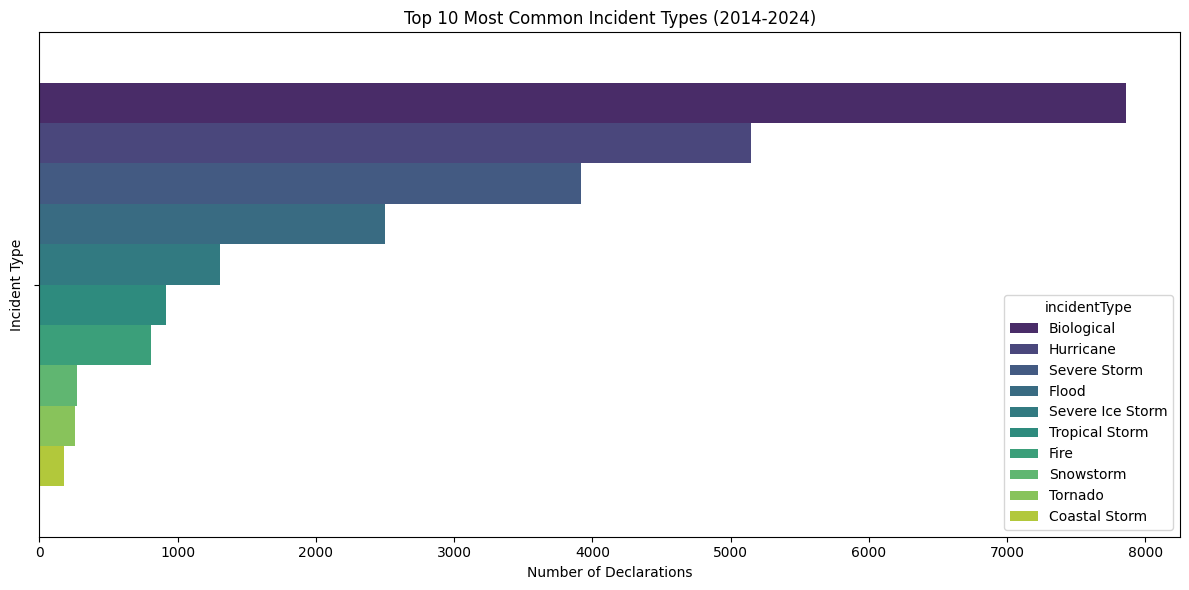

In [ ]:
# 1. What types of disasters are most frequently declared?

# Created a Pandas Series named `incident_counts` to identify the top 10 most common disaster types.
# This was generated using the value counts of the 'incidentType' column and applying .head(10) to extract the top ten most frequent incident types.
incident_counts = declarations['incidentType'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=incident_counts.values, hue=incident_counts.index, palette='viridis')
plt.title('Top 10 Most Common Incident Types (2014-2024)')
plt.xlabel('Number of Declarations')
plt.ylabel('Incident Type')
plt.tight_layout()
plt.show()


# Nick: Rather than having the index as the hue, I'd put that as the y-axis to make it easier to read

<h2 style="color: #1E90FF;">1. What types of disasters are most frequently declared?</h2>

- **Top Declared Disasters (2014–2024)**:
  - **Biological incidents**: Most frequent, likely due to the COVID-19 pandemic and widespread declarations.
  - **Hurricanes**: Second most common, highlighting the U.S.'s susceptibility, especially in coastal areas with intense hurricane seasons.
  - **Severe storms**: Includes tornadoes and high winds, showing the nation’s exposure to varied and extreme weather.


<h3 style="color: #1E90FF;">Understanding Disaster Declarations:</h3>

A disaster declaration is an official response mechanism that enables federal assistance when an incident overwhelms state and local capabilities. Each declaration is tied to a specific type of disaster and signifies that federal resources are mobilized to support affected areas. The high number of declarations in these categories reflects the frequency and impact of these types of incidents over the analyzed period.

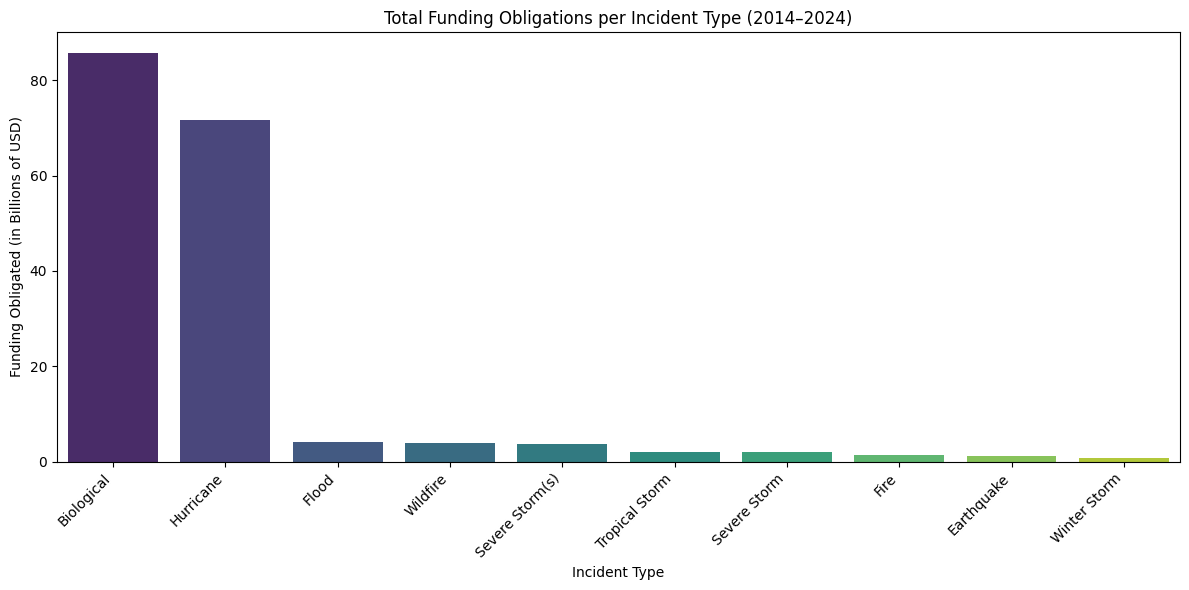

In [45]:
# 2. How is funding distributed across different types of incidents

# A Pandas Series named `incident_funding` was created by grouping the `focused_data` DataFrame by 'incidentType'
# and calculating the sum of the 'totalObligated' column for each group. The result was sorted in descending order,
# and the top 10 incident types were selected based on the total obligated amount.
incident_funding = focused_data.groupby('incidentType')['totalObligated'].sum().sort_values(ascending=False).head(10)

# The values were divided by 1e9 to convert the total obligated amounts to billions
# This conversion helps avoid scientific notation in the output, making large numbers easier to read and interpret.
incident_funding = incident_funding / 1e9 


plt.figure(figsize=(12, 6))
sns.barplot(x=incident_funding.index, y= incident_funding.values,palette='viridis')
plt.title("Total Funding Obligations per Incident Type (2014–2024)")
plt.xlabel("Incident Type")
plt.ylabel("Funding Obligated (in Billions of USD)")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<h2 style="color: #1E90FF;">2. How is funding distributed across different types of incidents, and which types receive the most significant allocations?</h2>

- **Biological Incidents**:
  - Received the highest allocation, over **$80 billion**.
  - Reflects the extensive resources needed for nationwide health responses (e.g., medical supplies, vaccinations).
  - Large number of affected states/regions often leads to multiple individual declarations.

- **Hurricanes**:
  - Second highest funding, nearly **$70 billion**.
  - Highlights severe destruction and recovery efforts, including costly rebuilding and infrastructure restoration.
  - Impact on multiple states during active hurricane seasons could contribute to high funding.

- **Other Incident Types**:
  - **Floods, wildfires, and severe storms** received significantly less funding.
  - Likely due to more localized impacts, affecting fewer regions or requiring less extensive federal support.

In [46]:

#3. Which States Receive the Highest Levels of Funding

# JSON file containing the geographic boundaries and properties of each U.S. state was sourced from PublicaMundi's Mapping API repository on GitHub.
us_states_geo = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'

# A Pandas Series `state_funding` was created where the index represented the state name and the values were the sum of total obligated funding.
state_funding = focused_data.groupby('state')['totalObligated'].sum()

# The Pandas Series `state_funding` was converted into a DataFrame named `state_fundingdf` for compatability with folium and cloropleth. 
state_fundingdf = pd.DataFrame({'state': state_funding.index, 'total_funding': state_funding.values})

# A Folium map centered on the United States was defined using latitude and longitude coordinates.
# A choropleth layer was added using `us_states_geo` to create a heat map that displayed total funding obligated by state.
usa_map = folium.Map(location =[37.8, -96],zoom_start=4)
Choropleth(
    geo_data=us_states_geo, # The GeoJSON file that contains the geographic boundaries of U.S. states.
    name='choropleth', # The name of the layer
    data=state_fundingdf, #The DataFrame containing the data to be visualized.
    columns=['state', 'total_funding'], # Specifies the columns in the DataFrame: 'state' as the geographic identifier and 'total_funding' as the data value.
    key_on='feature.properties.name', # Links the 'state' column in the DataFrame to the 'name' property in the GeoJSON file to match data and geography.
    fill_color='OrRd', # The color scale for the map, here using an orange-red palette 
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Obligated Funding ($)'
).add_to(usa_map)

usa_map

<h2 style="color: #1E90FF;">3. Which States Receive the Highest Levels of Funding, and What Factors Contribute to This Distribution?</h2>

The heatmap shows that from 2014 to 2024, **Puerto Rico** stands out as the most deeply shaded state, indicating the highest levels of obligated federal funding. This is followed by **Texas**, with significant funding, and then **California**, **Florida**, **New York**, and **Louisiana**.

<h3 style="color: #1E90FF;">Key Factors:</h3>

- **Puerto Rico**: The deep red shading underscores the extensive funding, likely driven by major recovery efforts following disasters such as **Hurricane Maria (2017)**, which resulted in widespread devastation and long-term recovery needs.

- **Texas**: High funding levels are due to recurring hurricanes, severe storms, and flooding. The 2021 **Winter Storm Uri**, which brought record-low temperatures, heavy snowfall, and frozen pipelines, led to a significant federal response to address power outages and infrastructure recovery.

- **California**: Significant funding is attributed to frequent natural disasters like wildfires and earthquakes. It may also be influenced by the extensive response efforts during the COVID-19 pandemic, which heavily impacted the state.

- **Florida**: Consistently impacted by hurricanes and tropical storms, necessitating continuous federal assistance.

- **New York**: Receives substantial funding due to severe weather events and may have seen increased funding as a result of the COVID-19 pandemic response.

- **Louisiana**: Its position along the Gulf Coast makes it particularly vulnerable to hurricanes, leading to notable federal funding for response and recovery.

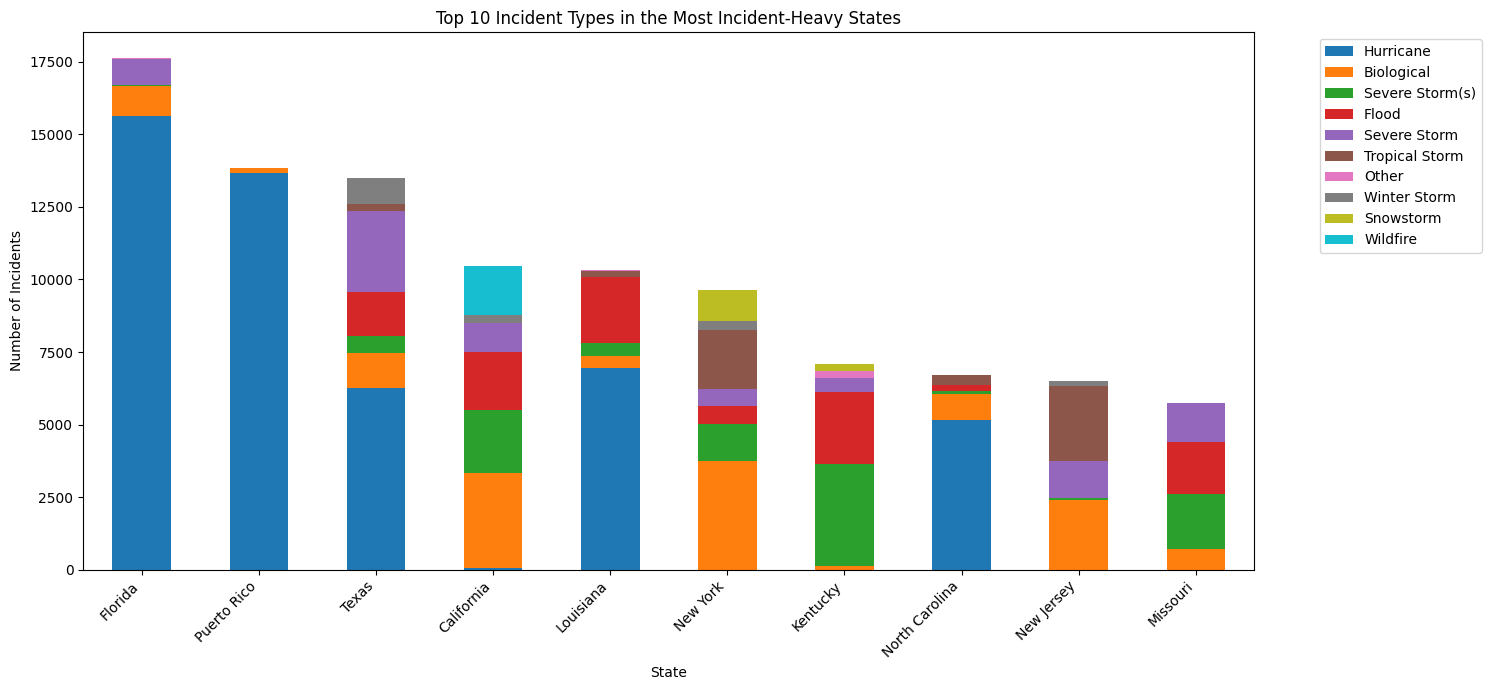

In [ ]:
# Pandas series to Identify the top 10 states with the most incident declarations
top10_states = focused_data['state'].value_counts().head(10).index

# The DataFrame `state_incident_counts` was created to filter the data for the top 10 states, grouped by state and incident type, counted occurrences, and converted to a wide format with NaN values filled as 0.
state_incident_counts = focused_data[focused_data['state'].isin(top10_states)].groupby(['state', 'incidentType']).size().unstack(fill_value=0)

#filtered to Identify the top 10 most occurring incident types
top10_incident_types = focused_data['incidentType'].value_counts().head(10).index

# Filter 'state_incident_counts' to include only these top 10 incident types and top 10 states
state_incident_counts_top10 = state_incident_counts[top10_incident_types]

# Added a 'Total' column to `state_incident_counts_top10` by summing values across each row (axis=1) to get the total count of incidents for each state.
state_incident_counts_top10['Total'] = state_incident_counts_top10.sum(axis=1)

# Sorted `state_incident_counts_top10` by the 'Total' column in descending order to show states with the highest incident counts first, then dropped the 'Total' column.
state_incident_counts_top10 = state_incident_counts_top10.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plotting the updated data
state_incident_counts_top10.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab10')
plt.title('Top 10 Incident Types in the Most Incident-Heavy States')
plt.xlabel('State')
plt.ylabel('Number of Incidents')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Nick: Really nice!


- **Leading States**:
  - **Florida**, **Puerto Rico**, and **Texas** reported the highest number of incidents, driven by **hurricanes** and **severe storms**.
  - **Puerto Rico's** significant incidents, especially **Hurricane Maria (2017)**, explain its notable funding allocation.

- **California**:
  - Experienced a variety of incidents, including **wildfires**, **biological incidents**, and **severe storms**.
  - Required significant resources for wildfire management and the **COVID-19 pandemic** response.

- **New York**:
  - Impacted by **biological incidents** (e.g., COVID-19) and **severe storms**.
  - Corresponds to a higher level of federal support.

- **Louisiana**:
  - Frequently faced **hurricanes** and **floods**, contributing to its significant funding needs.

- **Other Notable States**:
  - **Kentucky** and **North Carolina** experienced a mix of **floods**, **severe storms**, and **hurricanes**, contributing to their incident counts.

### Key Takeaways:
- **Incident Types and Funding**:
  - The types and frequency of incidents heavily influence the distribution of federal funding.
  - States with recurring **hurricanes**, **wildfires**, and public health challenges (e.g., California, Florida, Texas, New York) receive substantial resources for recovery and future preparedness.



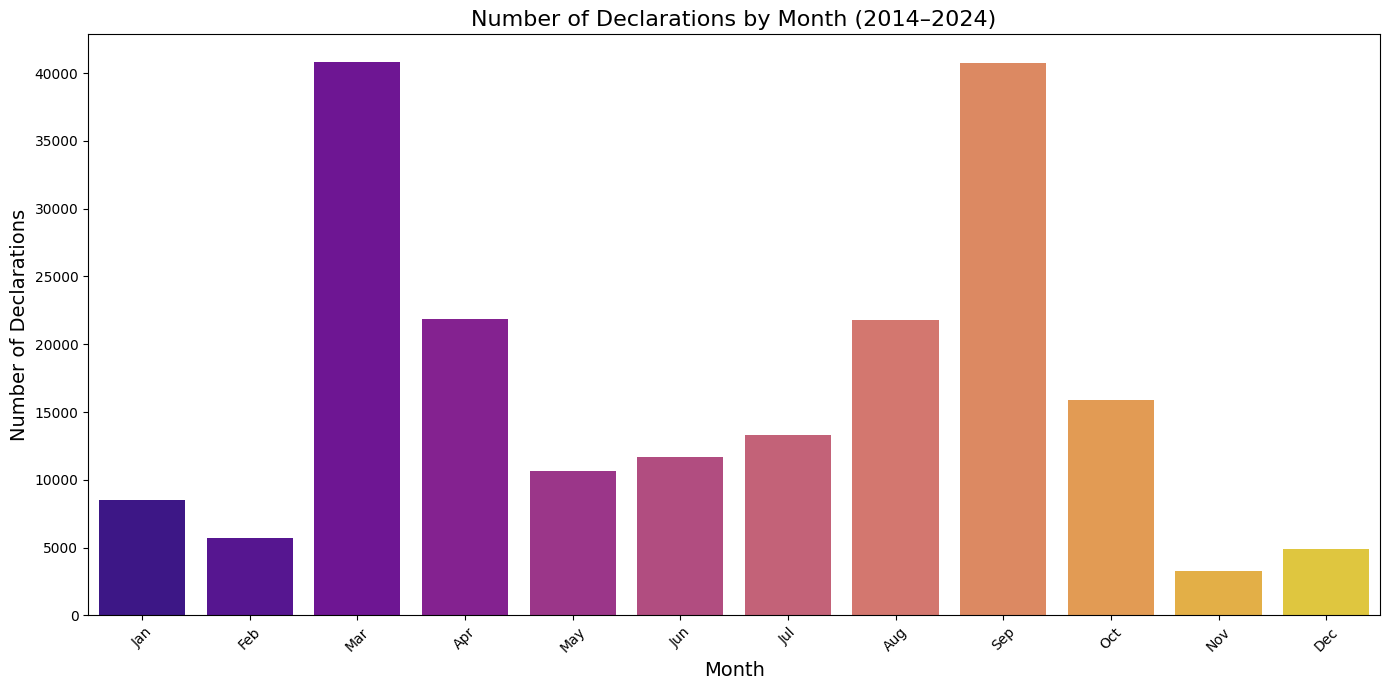

In [48]:
# The number of declarations for each month was counted and sorted by month index for chronological order.
month_counts = focused_data['month'].value_counts().sort_index()

# Set up the plot
plt.figure(figsize=(14, 7))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='plasma')

# Added title and labels
plt.title('Number of Declarations by Month (2014–2024)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Declarations', fontsize=14)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()


<h2 style="color: #1E90FF;">4. During which seasons or times of the year are disasters most likely to occur, and are there any notable patterns?</h2>

- **Peak Months**:
  - **March**: Marks the start of severe weather season, leading to increased incidents like **tornadoes** and **flooding**.
  - **September**: Peak of the **Atlantic hurricane season**, contributing to a high number of disaster declarations.

- **Low-Activity Months**:
  - **November**, **December**, and **February** show the fewest declarations, likely due to reduced storm activity and the end of the hurricane season.

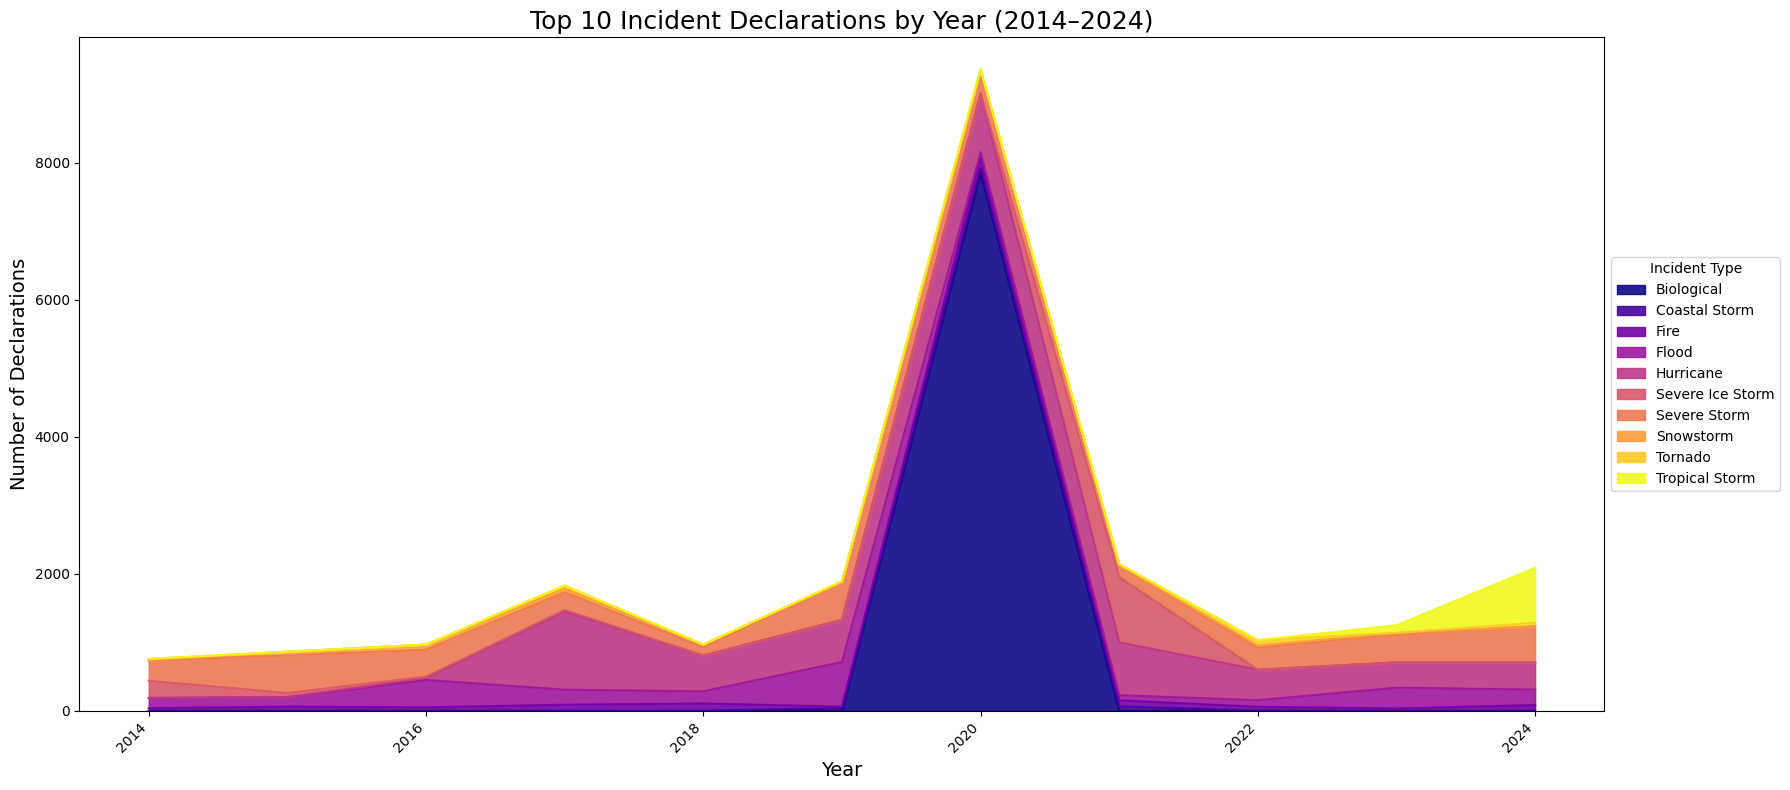

In [49]:
#Identified the top 10 most occurring incident types and saved as topten_incidents
topten_incidents = declarations['incidentType'].value_counts().head(10).index

#Filtered the declarations DataFrame to only include rows where incident type is in topten_incidents
topten_only = declarations[declarations['incidentType'].isin(topten_incidents)]

#Grouped by year declared and incident type, got the counts of each by using .size() and unstack for a wide format
pivot_data = topten_only.groupby(['fyDeclared', 'incidentType']).size().unstack(fill_value=0)

# Plotting a cumulative area chart
pivot_data.plot(kind='area', stacked=True, figsize=(18, 8), colormap='plasma', alpha=0.9)

# Customizing the plot
plt.title('Top 10 Incident Declarations by Year (2014–2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Declarations', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Position the legend on the right side for better visibility
plt.legend(title='Incident Type', loc='center left', bbox_to_anchor=(1.0, 0.5))

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


### Trends in Top 10 Incident Declarations (2014–2024)

- **2020 Spike**:
  - Significant increase in declarations due to **biological incidents**, driven by the **COVID-19 pandemic**.
  - Led to numerous federal disaster declarations across the U.S.

- **2017 Peak**:
  - Marked by major hurricane activity, including **Hurricanes Harvey, Irma, and Maria**.
  - These hurricanes caused widespread damage, resulting in a surge of federal disaster declarations.


<h2 style="color: #1E90FF;">Summary of Findings:</h2>


**1. Most Frequently Declared Disaster Types:**
- Severe storms, hurricanes, and floods were among the most frequently declared disaster types over the past decade.
- Biological incidents had a significant spike, notably in 2020.

**2. Funding Distribution Across Disaster Types:**
- Biological incidents and hurricanes received the highest levels of federal funding, indicating their substantial impact on public health and infrastructure.
- Floods, wildfires, and severe storms also received notable funding, but generally less than biological incidents and hurricanes, suggesting more localized or shorter recovery periods.
- Average funding amounts per incident type varied, with hurricanes and biological incidents commanding higher allocations per declaration compared to other types.

**3. States Receiving the Most Funding and Contributing Factors:**
- California, Texas, Florida, Puerto Rico, New York, and Louisiana were the top recipients of federal funding.
- Contributing factors include exposure to hurricanes, wildfires, and severe storms, as well as the significant impact of COVID-19 in certain states.
- These states' high funding levels suggest that they experience a greater frequency and severity of incidents, requiring extensive federal assistance.

<h2 style="color: #1E90FF;">Business Recommendations</h2>

- **Where to submit proposals**: Prioritize states such as California, Texas, Florida, Puerto Rico, New York, and Louisiana, as they consistently experience a high frequency of incidents and receive substantial funding allocations.

- **Optimal times of the year for bids**: Target spring, particularly **March**, and early fall, especially **September**, as these months have historically shown the highest number of disaster declarations.

- **Prioritizing incident types**: Target support for hurricanes, severe storms, and biological incidents to align with the most funded and frequently declared disasters.
<div style="display: flex; justify-content: center; margin: 0 auto; padding: 20px 0; width: 100%; text-align: center;">
    <img src="objectives_image.jpg" alt="Strategic Planning Image" style="max-width: 600px; width: 100%; height: auto; aspect-ratio: 16/6; object-fit: cover; border-radius: 10px; margin-left: 10%;" />
</div>

   <em>Image courtesy of <a href="https://www.istockphoto.com/" target="_blank">iStockphoto</a>.</em>
</p>





In [ ]:
# Nick: Overall, your code was absolutely excellent and very well commented!